# Overview
## ML Model Predicts SMA
The goal is to make a model that will attempt to predict the the sma of data given a range of data.

### SMA
Simple Moving Average (SMA) is a technical indicator that has been widely used to determine if a stock is directionally moving in a positive or negative direction. The formula is fairly straight forward. Take sum the historical range, and divide it by the number in that range.

### Model
The model being created here should be able to take a series of inputs and determine an average for the series of data. Next, I will feed it unknown data and it will predict the average for that dataset. 

### Approaches
1) A weighted bunch of input values and a single input of number of bunched values. Cons: is that maybe the input values in the network is maybe fixed, and possibly that it may not adjust.
2) Sum valued and number of bunched values. This is kinda like already the formula for the moving avg (sum of values / number of values). I'm curious if the machine will regress and figure this method out.

### Training Data
I want the model to be able to handle any input and not just one specific. I will be training on the years worth of data set of SPX. Also, I will be using the TA Lib to generate the SMA (although it would be simple to calculate, I thought using a library would be cool, as I could in the future trade it our for other indicators... RSA, MACD, ETC).
Prediction data to confirm will be using then a single APPL and TSLA. APPL will be the sure bet as the SPX's value is derived from it, and has a close alpha. TSLA was not added until post NOV 2020. So the 2019 data would not be included in the underlying value of SPX.

### Thank you!
* Tensorflow, dope af
* firstratedata.com, thank you for the minute tick data :D

In [5]:
# imports that are used for the model
import tensorflow as tf;
import pandas as pd;
import numpy as np;
import talib as ta;
import math;
import matplotlib.pyplot as plt;

In [6]:
# SMA Set Data Builder to extract training data and test data
def sma_data_set_builder(data: pd.DataFrame, column, period):
    # Feature Engineering
    # Build a x training set that contains high lows and a range of 
    period_chunks = np.array([np.array(data[i:i+period][column]) for i in range(0, data.shape[0] - period)])
    smas = np.array([ta.SMA(period_chunks[i], period)[-1] for i in range(len(period_chunks))])

    x_train, x_test = period_chunks[0:math.ceil(len(period_chunks)/2)], period_chunks[math.ceil(len(period_chunks)/2):]
    y_train, y_test = smas[0:math.ceil(len(smas)/2)], smas[math.ceil(len(smas)/2):]

    return (
        (x_train, x_test),
        (y_train, y_test)
    )

In [7]:
# Read in data we are going to use for creating and testing our model
spx_data = pd.read_csv(
    './data/SPX_2019_1min.csv',
    header=None,
    names=["date", "open", "high", "low", "close"],
    parse_dates=["date"],
    index_col=['date']
)
tsla_data = pd.read_csv(
    './data/TSLA_2019_1min.csv',
    header=None,
    names=["date", "open", "high", "low", "close", "volume"],
    parse_dates=["date"],
    index_col=["date"]
)

Build a basic fitting model that will attempt to fit a series of outputs, close prices, into one single prediction of a sma

In [8]:
(
    (spx_sma_x_train, spx_sma_x_test),
    (spx_sma_y_train, spx_sma_y_test)
) = sma_data_set_builder(spx_data, "close", 7)

In [9]:
spx_sma_model = tf.keras.models.Sequential()

spx_sma_model.add(tf.keras.layers.Input(shape=(spx_sma_x_train.shape[1],), dtype="float64"))
spx_sma_model.add(tf.keras.layers.Dense(1028, activation='relu'))
spx_sma_model.add(tf.keras.layers.Dense(1))

spx_sma_model.compile(optimizer='adam', loss="mean_squared_error")

In [10]:
spx_sma_model.fit(spx_sma_x_train, spx_sma_y_train, epochs=100, verbose=0)

2023-02-09 00:23:05.162588: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [11]:
pred_spx_sma = spx_sma_model.predict(np.array([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]]), verbose=0)
print(pred_spx_sma[0][0])
print(ta.SMA(np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]), 7)[-1])

4.0260487
4.0


Graph the smas

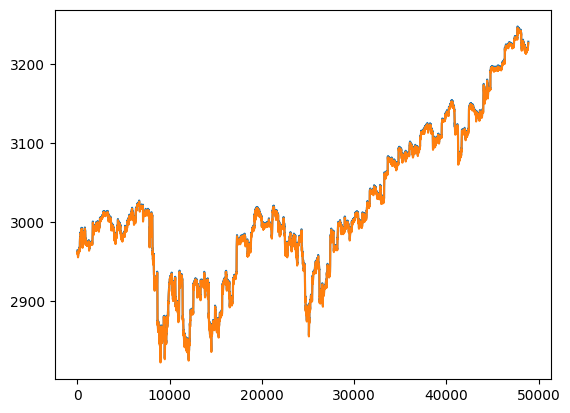

In [13]:
plt.plot(spx_sma_y_test)
plt.plot(spx_sma_model.predict(spx_sma_x_test, verbose=0))

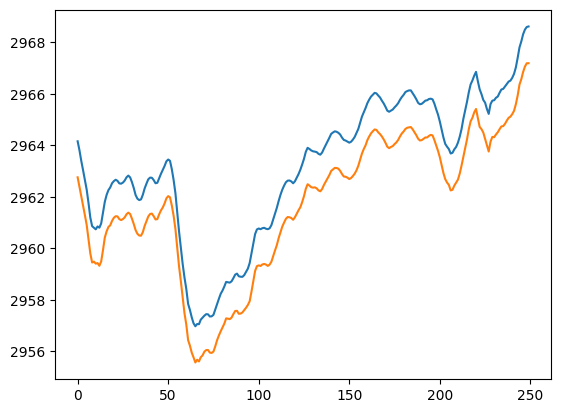

In [14]:
plt.plot(spx_sma_y_test[:250])
plt.plot(spx_sma_model.predict(spx_sma_x_test[:250], verbose=0))

In [ ]:
# Model Constants
period = 7

# Feature Engineering
# Build a x training set that contains high lows and a range of 
tsla_x_test = np.array([np.array(tsla_data[i:i+period]["close"]) for i in range(0, tsla_data.shape[0] - period)])
tsla_y_test = np.array([ta.SMA(tsla_x_test[i], period)[-1] for i in range(len(tsla_x_test))])

model.evaluate(tsla_x_test, tsla_y_test)

4388/4388 [==============================] - 1s 256us/step - loss: 0.0091


0.009057312272489071

1528/1528 [==============================] - 0s 243us/step


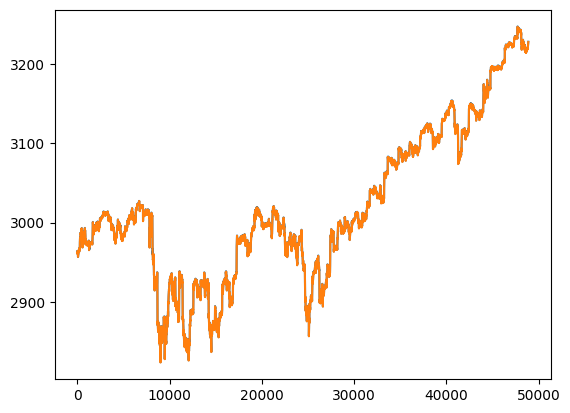

In [ ]:
plt.plot(y_test)
plt.plot(model.predict(x_test))

8/8 [==============================] - 0s 443us/step


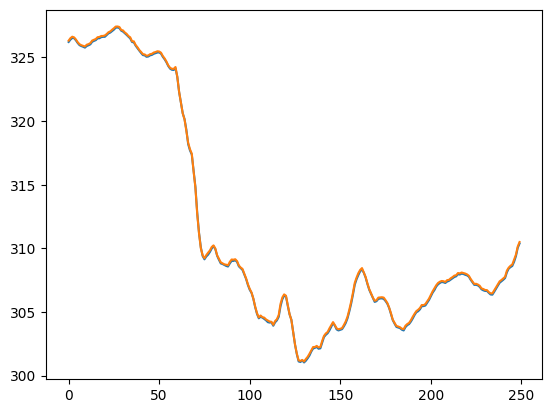

In [ ]:
plt.plot(tsla_y_test[:250])
plt.plot(model.predict(tsla_x_test[:250]))